# Boston Housing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from __future__ import division

import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Attributes
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's


# Problem definition

## What is the problem?

### Description

Estimate the price of a house.


### Assumptions

Expected positive correlation: RAD, RM, ZN
Expected negative correlation: AGE, B, CRIM, CRIM, DIS, INDUS, LSTAT, NOX, PTRATIO, TAX

### Description of provided data

Number of instances: 506
Number of attributes: 13
Target attribute: MEDV (Median value of owner-occupied homes in $1000's)

## Why does the problem need to be solved?

### Motivation

- It is a Data Science excercise
- In real world it would be useful both for real estate agencies, house owners willing to sell the house or potential buyers.

### Benefits

- Explore the various phases of the ML process, in this case mainly problem definition and data preparation and exploration.
- In real world: estimating prices more precisely than human guess -> higher liquidity -> more houses sold -> useful for all parties interested.

## How would you solve the problem manually?
Look at the data, compare each attribute to houses with similar attribute values and try to average the price somehow.

# Data Analysis

In [2]:
# Import the dataset
df = pd.read_csv('input/housing.csv')

In [3]:
# Analyzing dataset structure
instance_count, attr_count = df.shape
print('Number of instances: %d' % instance_count)
print('Number of attributes: %d' % attr_count)
print('Column names: %s' %  ', '.join(df.columns))

Number of instances: 506
Number of attributes: 14
Column names: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV


In [4]:
# Descriptive statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,505.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,505.000000,506.000000,505.000000,506.000000,506.000000,506.000000
mean,3.613524,11.386139,11.136779,0.069170,0.554728,6.284634,68.574901,3.795043,9.520792,408.237154,18.455446,356.674032,12.653063,22.532806
std,8.601545,23.340080,6.860353,0.253994,0.115990,0.702617,28.148861,2.105710,8.692045,168.537116,2.167091,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.100000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Attribute distribution summary
missing_counts = len(df) - df.count()
if missing_counts.any():
    print 'Missing values:'
    print missing_counts
else:
    print('Missing values: NONE')

Missing values:
CRIM       0
ZN         1
INDUS      0
CHAS       0
NOX        1
RM         0
AGE        0
DIS        0
RAD        1
TAX        0
PTRATIO    1
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
# View missing values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
30,1.13081,0.0,8.14,0,NaN,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60,12.7
85,0.05735,0.0,4.49,0,0.449,6.630,56.1,4.4377,3.0,247.0,NaN,392.30,6.53,26.6
211,0.37578,NaN,10.59,1,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,NaN,666.0,20.2,392.92,10.42,21.8


In [7]:
# How many missing values?
len(df[df.isnull().any(axis=1)]) / len(df)

0.007905138339920948

In [8]:
# Delete missing
df = df.dropna()

In [9]:
# Default is Pearson correlation coefficient
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.201881,0.406702,-0.054337,0.420353,-0.221146,0.354269,-0.379532,0.627176,0.584015,0.291549,-0.384672,0.459449,-0.389560
ZN,-0.201881,1.000000,-0.535944,-0.040517,-0.519492,0.310966,-0.571347,0.665725,-0.313888,-0.316975,-0.390829,0.176988,-0.413801,0.360282
INDUS,0.406702,-0.535944,1.000000,0.064324,0.764641,-0.392165,0.649869,-0.709196,0.593400,0.719762,0.384301,-0.357867,0.608742,-0.485447
CHAS,-0.054337,-0.040517,0.064324,1.000000,0.096086,0.101483,0.082388,-0.099755,-0.002640,-0.030483,-0.122863,0.046815,-0.066593,0.180156
NOX,0.420353,-0.519492,0.764641,0.096086,1.000000,-0.304529,0.734067,-0.769681,0.613077,0.669447,0.190322,-0.379341,0.595244,-0.428401
RM,-0.221146,0.310966,-0.392165,0.101483,-0.304529,1.000000,-0.239406,0.206002,-0.210779,-0.293885,-0.354038,0.129850,-0.612291,0.695313
AGE,0.354269,-0.571347,0.649869,0.082388,0.734067,-0.239406,1.000000,-0.749616,0.463768,0.514275,0.262118,-0.273888,0.600888,-0.375800
DIS,-0.379532,0.665725,-0.709196,-0.099755,-0.769681,0.206002,-0.749616,1.000000,-0.496536,-0.536469,-0.233704,0.291384,-0.499478,0.250489
RAD,0.627176,-0.313888,0.593400,-0.002640,0.613077,-0.210779,0.463768,-0.496536,1.000000,0.909560,0.466548,-0.446601,0.496827,-0.384635
TAX,0.584015,-0.316975,0.719762,-0.030483,0.669447,-0.293885,0.514275,-0.536469,0.909560,1.000000,0.462832,-0.443645,0.552633,-0.471936


In [27]:
corr_with_target = corr.ix[-1][:-1]
corr_with_target.sort_values(ascending=False)

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')


In [28]:
pd.Series(sorted(corr_with_target, key = lambda x: -abs(x)), index = corr_with_target.index)

CRIM      -0.737849
ZN         0.695313
INDUS     -0.506898
CHAS      -0.485447
NOX       -0.471936
RM        -0.428401
AGE       -0.389560
DIS       -0.384635
RAD       -0.375800
TAX        0.360282
PTRATIO    0.334212
B          0.250489
LSTAT      0.180156
dtype: float64

In [11]:
attrs = corr.iloc[:-1,:-1] # All except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

,attribute pair,correlation
19,"(RAD, TAX)",0.909560
5,"(DIS, NOX)",-0.769681
23,"(INDUS, NOX)",0.764641
9,"(AGE, DIS)",-0.749616
15,"(AGE, NOX)",0.734067
16,"(INDUS, TAX)",0.719762
17,"(DIS, INDUS)",-0.709196
11,"(NOX, TAX)",0.669447
3,"(DIS, ZN)",0.665725
13,"(AGE, INDUS)",0.649869


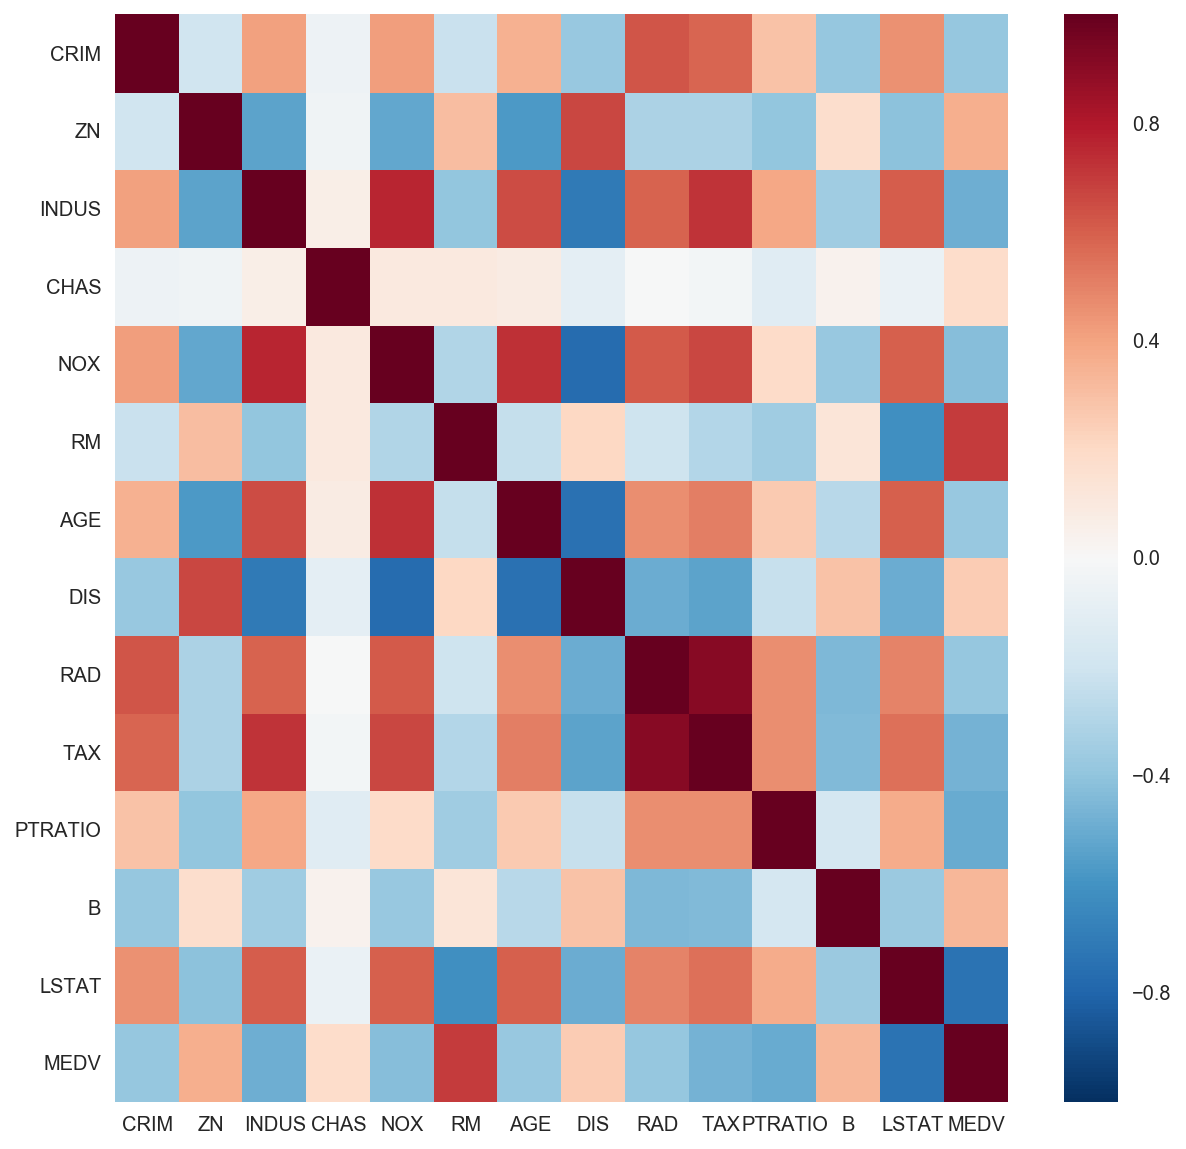

In [12]:
# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax)

(array([  3.,   1.,   7.,   7.,   3.,   6.,   8.,  10.,   7.,  23.,  15.,
         19.,  14.,  16.,  18.,  27.,  36.,  29.,  32.,  28.,  37.,  21.,
         15.,   4.,   6.,  11.,   9.,   9.,   5.,   7.,   7.,   8.,   2.,
          8.,   5.,   4.,   2.,   1.,   1.,   0.,   2.,   2.,   2.,   2.,
          2.,   1.,   1.,   0.,   3.,  16.]),
 array([  5. ,   5.9,   6.8,   7.7,   8.6,   9.5,  10.4,  11.3,  12.2,
         13.1,  14. ,  14.9,  15.8,  16.7,  17.6,  18.5,  19.4,  20.3,
         21.2,  22.1,  23. ,  23.9,  24.8,  25.7,  26.6,  27.5,  28.4,
         29.3,  30.2,  31.1,  32. ,  32.9,  33.8,  34.7,  35.6,  36.5,
         37.4,  38.3,  39.2,  40.1,  41. ,  41.9,  42.8,  43.7,  44.6,
         45.5,  46.4,  47.3,  48.2,  49.1,  50. ]),
 <a list of 50 Patch objects>)

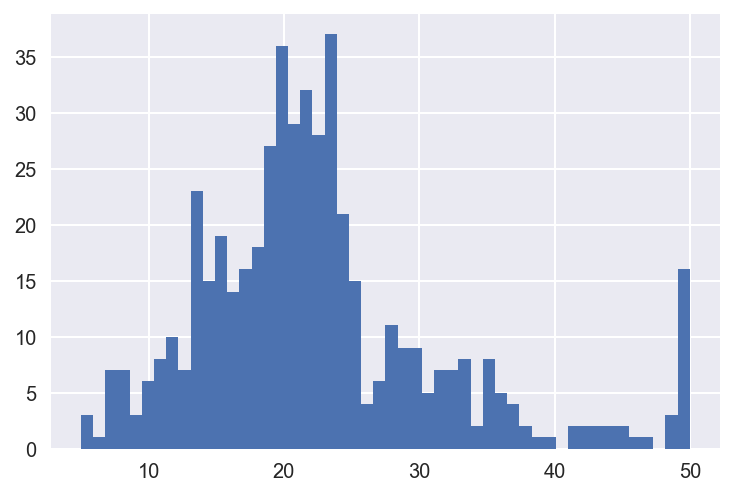

In [13]:
attr = df['MEDV']
plt.hist(attr, bins=50)

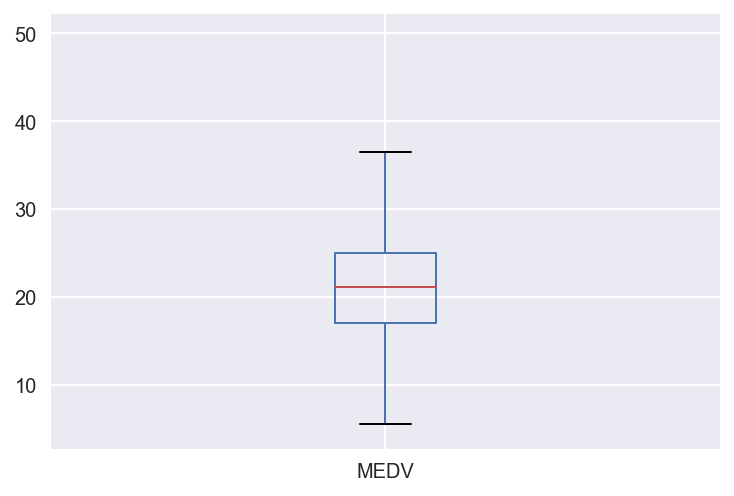

In [14]:
attr.plot(kind='box')

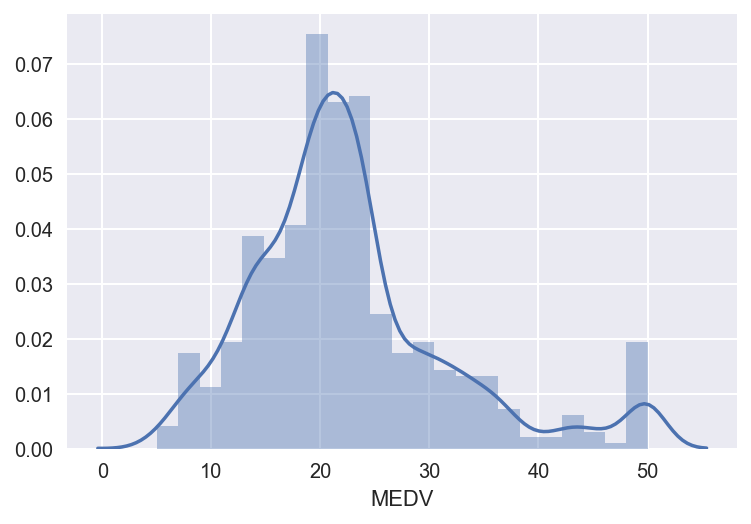

In [15]:
sns.distplot(attr)

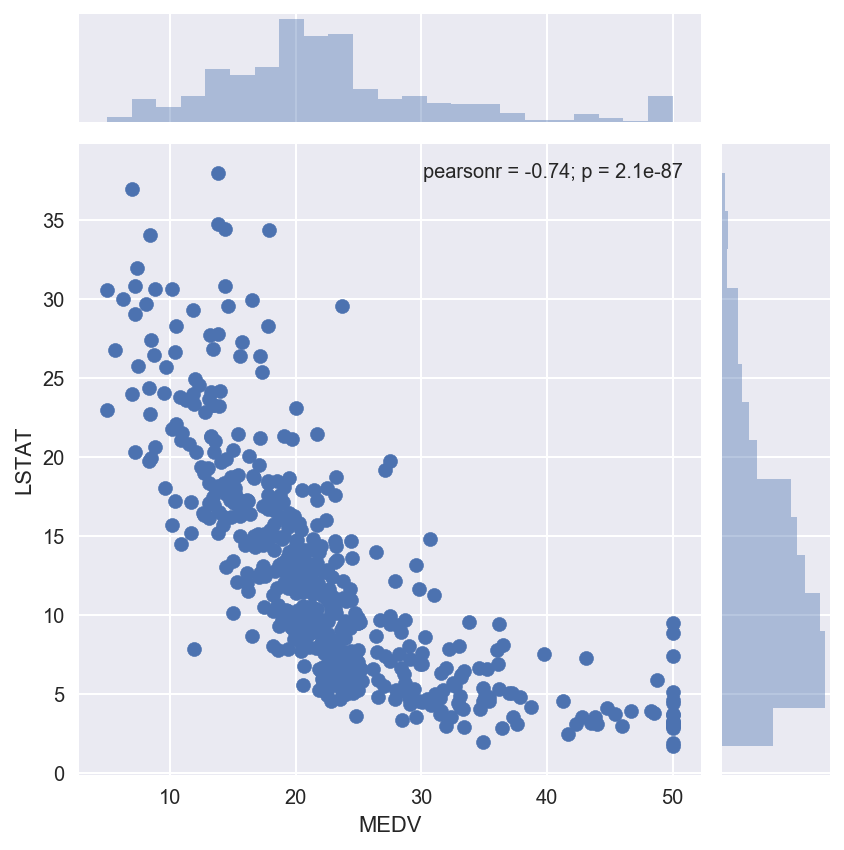

In [16]:
sns.jointplot(df['MEDV'], df['LSTAT'], kind='scatter')

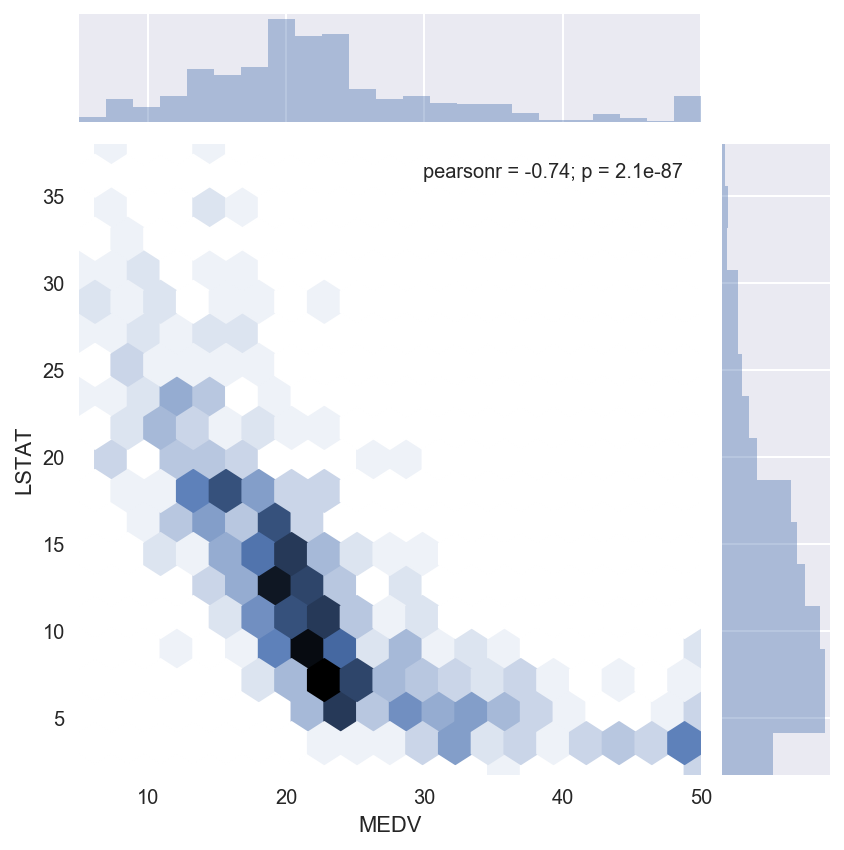

In [17]:
sns.jointplot(df['MEDV'], df['LSTAT'], kind='hex')

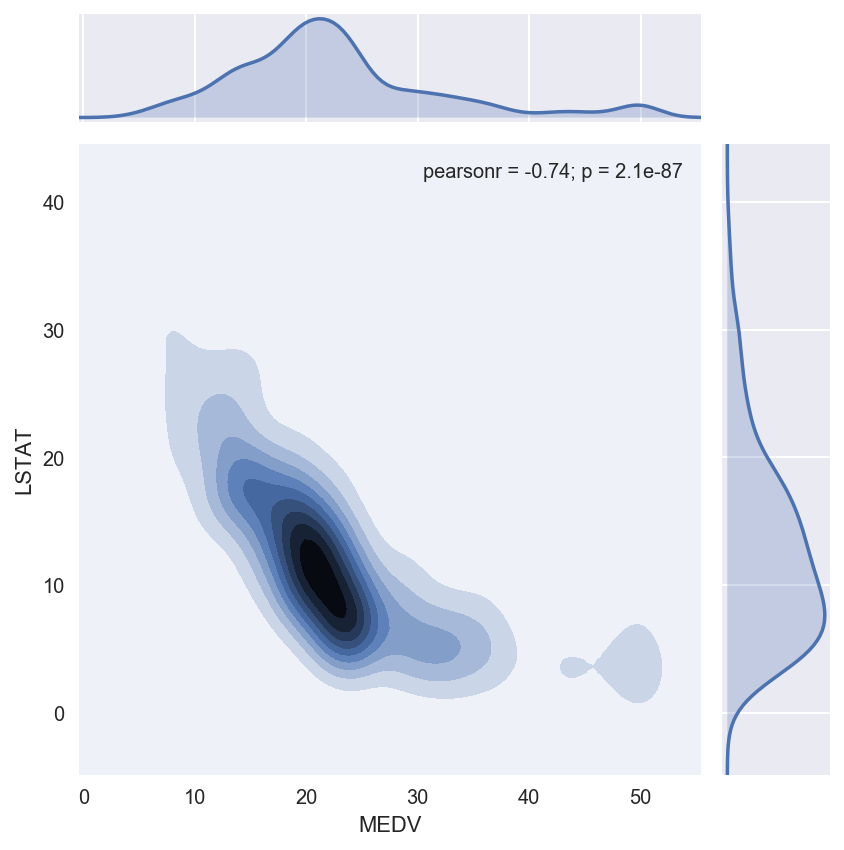

In [18]:
sns.jointplot(df['MEDV'], df['LSTAT'], kind='kde')

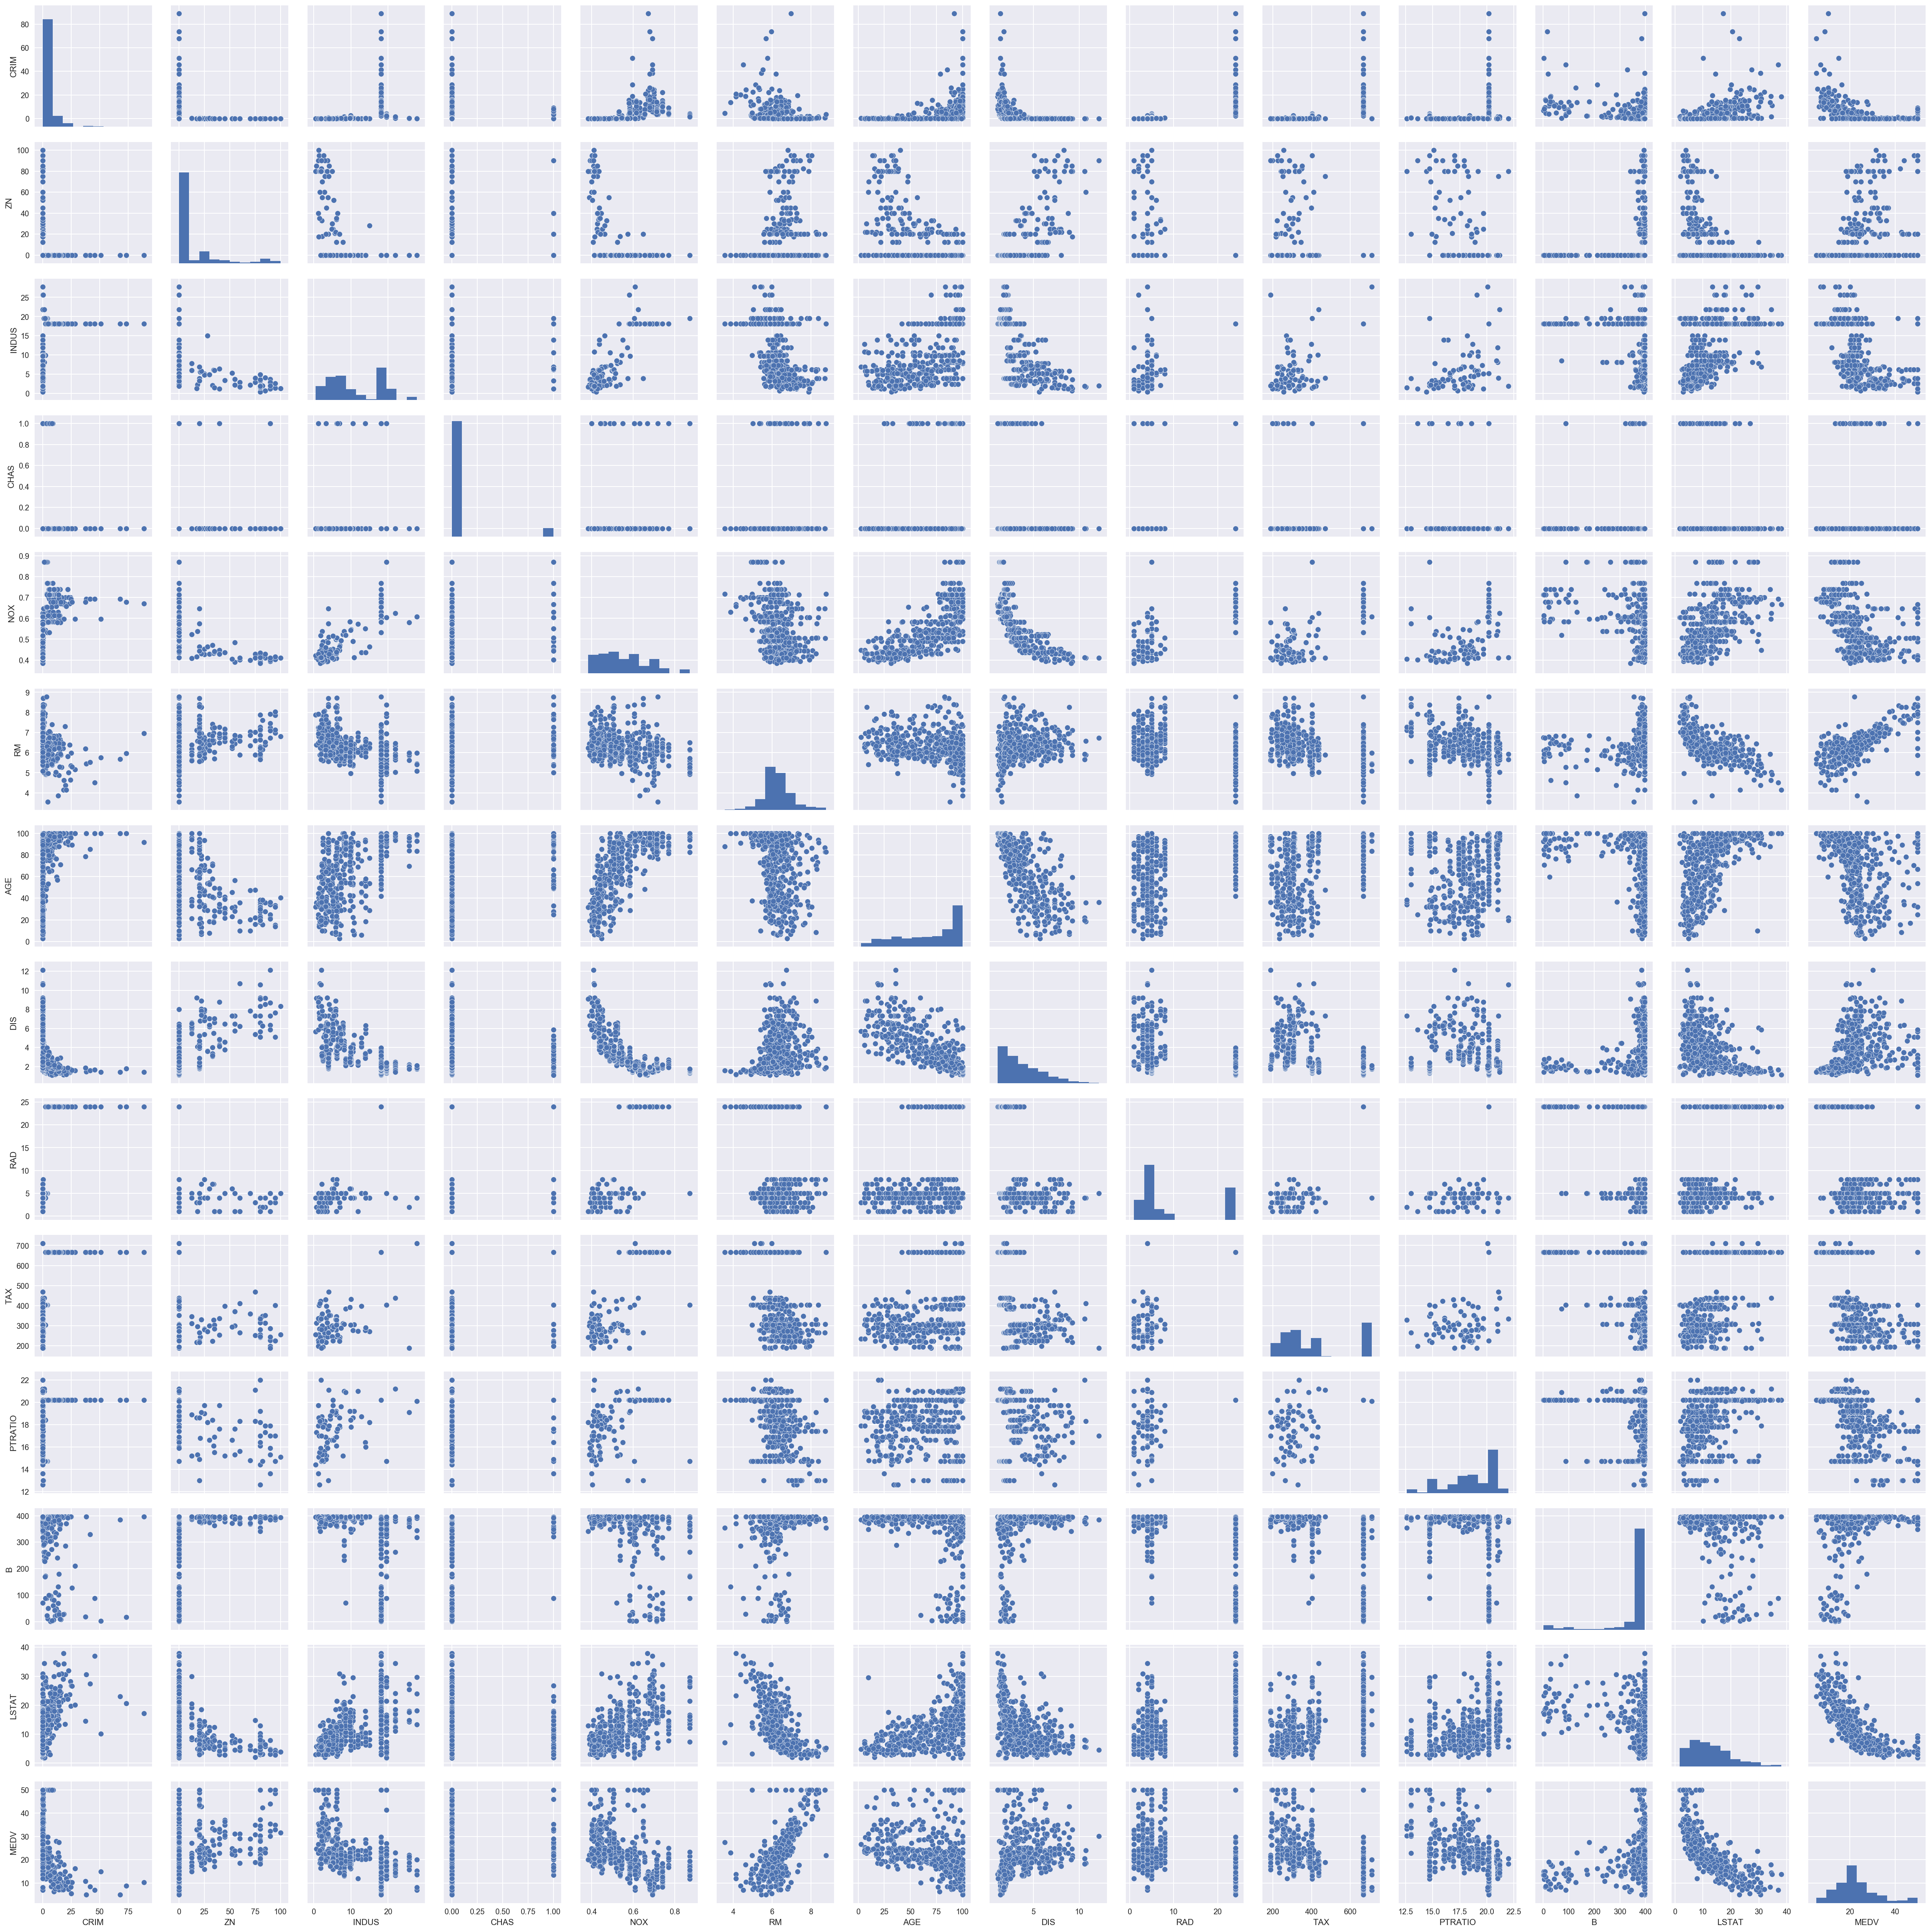

In [19]:
sns.pairplot(df)